In [76]:
import pandas as pd
import os
from glob import glob
from tqdm import tqdm
tqdm.pandas()

from transformers_helper import load_tokenizer_and_model

(source) books -> electronics (target)

In [88]:
pt_raw_dir = '/media/dmlab/My Passport/DATA/cross-domain/prev_pilot/test_using_post-trained_raw/target=electronics_source=books_raw'
ft_raw_dir = '/media/dmlab/My Passport/DATA/cross-domain/prev_pilot/finetune_using_post-trained_raw/source=books_raw_post=electronics&books_raw'
mdsd_filepath = '/media/dmlab/My Passport/DATA/cross-domain/data/MDSD_labeled.json'

* Confusion matrix (0: negative; 1: positive)
    - 정답은 Negative인데 Positive로 잘못 예측한 케이스 40
    - 정답은 Positive인데 Negative로 잘못 예측한 케이스 380

In [78]:
pd.read_csv(os.path.join(pt_raw_dir, 'confusion_matrix.csv'))

,true,0,1,n_true
0,0,933,40,973
1,1,380,608,988
2,n_pred,1313,648,1961


정답은 Positive인데 Negative로 잘못 예측한 케이스 380

In [79]:
df = pd.read_csv(os.path.join(pt_raw_dir, 'results.csv'))
print('\n\n'.join(df[(df['true_label']==1) & (df['predicted_label']==0)].text.values))

Not as easy to use as a larger Panasonic I used to own but otherwise fine. Good [UNK]. Using [UNK] player and [UNK]. Buying via Amazon as usual is super

It worked much better than expected. The [UNK] clips also were very good, but one fell off about 5 minutes into owning/using the item (I put it back on, but fell off a couple more times). I also get the feeling that the other parts are fragile as well.

I really don't have much to say about this [UNK] holder, not that it's just a [UNK] holder. It's a nice one. It does it's job. It's a little too expensive for just a piece of plastic. It's strong, sturdy, and it's big enough, even for those massive heavy text[UNK]s, like the Calculus ones. Although, I would not recommend putting a dictionary or reference that's like 6" thick (even though it still may hold). It's got little clamps at the bottom to prevent the page from flipping all over the place, although those tend to fall off when you move them. But that's no big deal. Just put them 

정답을 잘 맞춘 케이스

In [80]:
print('\n\n'.join(df[df['correct']==True].text.values))

I received my [UNK] 256MB SD [UNK] just as advertised. The unit came in the mail exactly 2 days after I ordered. Worked perfectly and I'm very satisfied

Works well, especially for anyone who still has their old console systems in use. I have my NES and [UNK], both of which have huge [UNK] adapters, plugged into this. It saves tons of sp[UNK]e on my power strip. The design is a little clumsy though, so it's only getting 4/5

I've had a number of universal [UNK]s over the years and each has had pluses and minuses to offer. The monster [UNK] is a very effective universal [UNK] on all accounts but there is ONE thing that stands out here above all the other [UNK]s. Wireless control over lighting. I replaced my dimmers and switches with the Monster dimmers and switches and now I can control every light in my house. Monster really doesn't talk much about this feature but being able to hit "ALL OFF" at night on my way to bed and have the [UNK] turn off all the house lights is killer. You can 

* 의심가는 부분 확인
    1. doc의 길이 
    2. sentiment words의 개수
            - Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (KDD-2004, full paper), Seattle, Washington, USA, Aug 22-25, 2004. 이용

100%|██████████| 1961/1961 [00:00<00:00, 669082.42it/s]
/home/dmlab/anaconda3/envs/torchtext/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of docs: 1541


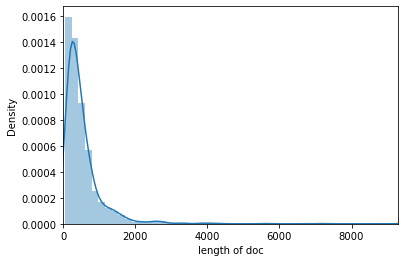

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

def distplot(values, max_x, x_label, filepath=None):
    sns_plot = sns.distplot(values)
    plt.xlim([0, max_x])
    plt.xlabel(x_label)  

    if filepath is not None:
        figure = sns_plot.get_figure()    
        figure.savefig(filepath, dpi=400)
        print('Created', filepath)    
        
df['text_len'] = df['text'].progress_apply(lambda x: len(x))

# 정답 잘 맞춘 케이스
df_sampled = df[df['correct']==True]
print('Number of docs: {}'.format(len(df_sampled)))
distplot(df_sampled.text_len.values, df_sampled.text_len.max(), 'length of doc', filepath=None)

Number of docs: 420


/home/dmlab/anaconda3/envs/torchtext/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


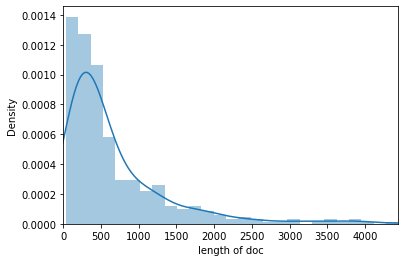

In [83]:
# 정답 못 맞춘 케이스
df_sampled = df[df['correct']==False]
print('Number of docs: {}'.format(len(df_sampled)))
distplot(df_sampled.text_len.values, df_sampled.text_len.max(), 'length of doc', filepath=None)

100%|██████████| 1961/1961 [00:03<00:00, 605.42it/s]
/home/dmlab/anaconda3/envs/torchtext/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of docs: 1541
          text_len    #positive    #negative   #sentiment
count  1541.000000  1541.000000  1541.000000  1541.000000
mean    520.434783     5.738482     6.242051    11.980532
std     581.479169     5.251073     6.532174    10.894757
min      47.000000     0.000000     0.000000     0.000000
25%     206.000000     2.000000     2.000000     5.000000
50%     366.000000     4.000000     4.000000     9.000000
75%     628.000000     8.000000     9.000000    16.000000
max    9293.000000    45.000000    83.000000   126.000000


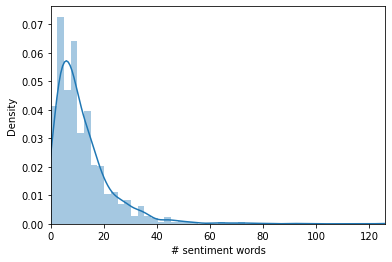

In [85]:
def find_sentiment_words_in_text(text, sentiment_words):
    cnt = 0
    for senti_word in sentiment_words:
        if senti_word in text:
            cnt += 1
    return cnt

lexicon_filepath = '/media/dmlab/My Passport/DATA/Lexicon/opinion_words_Hu,2004/opinion-words_6788.csv'
lexicon_df = pd.read_csv(lexicon_filepath)

positive_words = lexicon_df[lexicon_df['sentiment']=='positive'].token.values
negative_words = lexicon_df[lexicon_df['sentiment']=='negative'].token.values

df['#positive'] = df['text'].progress_apply(lambda x: find_sentiment_words_in_text(x, positive_words))
df['#negative'] = df['text'].progress_apply(lambda x: find_sentiment_words_in_text(x, negative_words))
df['#sentiment'] = df.apply(lambda x: x['#positive']+x['#negative'], axis=1)

# 정답 잘 맞춘 케이스
df_sampled = df[df['correct']==True]
print('Number of docs: {}'.format(len(df_sampled)))
print(df_sampled.drop(columns=['true_label', 'predicted_label']).describe())
distplot(df_sampled['#sentiment'].values, df_sampled['#sentiment'].max(), '# sentiment words', filepath=None)

Number of docs: 420
          text_len   #positive   #negative  #sentiment
count   420.000000  420.000000  420.000000  420.000000
mean    666.983333    6.733333    7.209524   13.942857
std     712.007074    6.385046    7.357811   13.191867
min      38.000000    0.000000    0.000000    0.000000
25%     215.750000    2.750000    2.000000    5.000000
50%     411.000000    5.000000    5.000000   10.000000
75%     848.750000    9.000000   10.000000   18.000000
max    4439.000000   42.000000   45.000000   77.000000


/home/dmlab/anaconda3/envs/torchtext/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


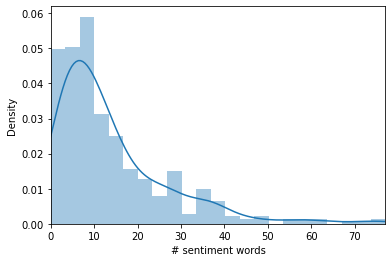

In [86]:
# 정답 못 맞춘 케이스
df_sampled = df[df['correct']==False]
print('Number of docs: {}'.format(len(df_sampled)))
print(df_sampled.drop(columns=['true_label', 'predicted_label']).describe())
distplot(df_sampled['#sentiment'].values, df_sampled['#sentiment'].max(), '# sentiment words', filepath=None)

# t-SNE

* feature 추출
    - distilbert-base-uncased, post-trained on books&electronics, finetuned on books
    - -> 소스는 소스끼리, 타겟은 타겟끼리 붙어있음 (domain gap이 좁혀지지 않았음)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.003s...
[t-SNE] Computed neighbors for 4000 samples in 0.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 1.184703
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.879532
[t-SNE] KL divergence after 1000 iterations: 2.111483


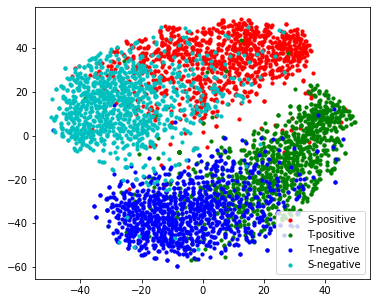

In [93]:
from transformers_helper import FeatureExtractor
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
%matplotlib inline

def tsne_2d(feature_values, label_index_values, label_names):

    X = list(feature_values)
    y = label_index_values

    tsne = TSNE(n_components=2, random_state=0, verbose=True)
    X_2d = tsne.fit_transform(X)

    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c' #, 'm', 'y', 'k', 'w', 'orange', 'purple', 'crimson', 'sienna'
    for i, c, label in zip(range(len(label_names)), colors, label_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label, s=10, linewidths=1)
    plt.legend()
    plt.show()

df = pd.read_json(mdsd_filepath)
df = df[df['domain'].isin(['books', 'electronics'])]

feature_extractor = FeatureExtractor(ft_raw_dir)
df['feature'] = df['text'].progress_apply(lambda x: feature_extractor.get_feature(x))
df['true_label'] = df.progress_apply(lambda x: 'S-'+x['label'] if x['domain']=='books' \
                            else 'T-'+x['label'], axis=1)

label_names = df['true_label'].unique()
label_to_index = {v:k for k,v in enumerate(label_names)}
df['label_idx'] = df['true_label'].progress_apply(lambda x: label_to_index[x])

feature_values = df['feature'].values
label_index_values = df['label_idx'].values

tsne_2d(feature_values, label_index_values, label_names)